<a href="https://colab.research.google.com/github/Saikeerthansa/PRODIGY_ML/blob/main/PRODIGY_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saikeerthansk1","key":"d00b2adc477a5c2cdc0441f3ede158d1"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d gti-upm/leapgestrecog

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [00:21<00:00, 95.4MB/s]
100% 2.13G/2.13G [00:21<00:00, 106MB/s] 


In [7]:
! unzip /content/leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [8]:
!ls /content/leapGestRecog

00  01	02  03	04  05	06  07	08  09


In [9]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [10]:
lookup = {}
reverselookup = {}
count = 0

In [11]:
base_path = '../content/leapGestRecog/'

In [12]:
for j in os.listdir(os.path.join(base_path, '00')):
    if not j.startswith('.'):
        lookup[j] = count
        reverselookup[count] = j
        count += 1

In [13]:
X = []
Y = []
datacount = 0

In [14]:
for i in range(10):
    folder_path = os.path.join(base_path, f'0{i}')
    for j in os.listdir(folder_path):
        if not j.startswith('.'):
            count = 0
            for k in os.listdir(os.path.join(folder_path, j)):
                img_path = os.path.join(folder_path, j, k)
                img = Image.open(img_path).convert('L')
                img = img.resize((160, 60))
                arr = np.array(img)
                X.append(arr)
                count += 1
            y_values = np.full((count,), lookup[j])
            Y.extend(y_values)
            datacount += count

In [15]:
X = np.array(X, dtype='float32')
Y = np.array(Y, dtype='int32')

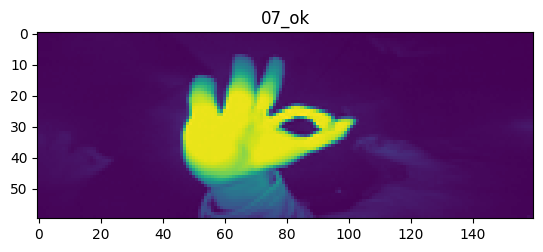

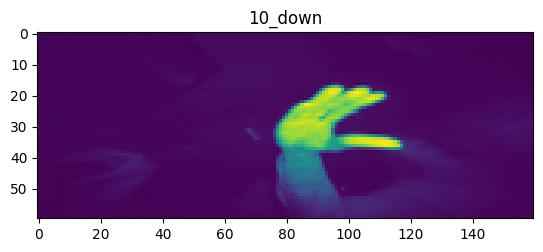

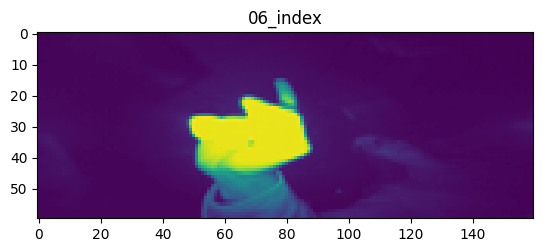

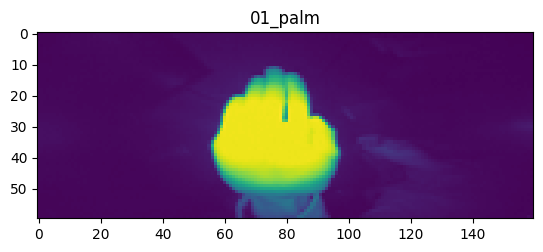

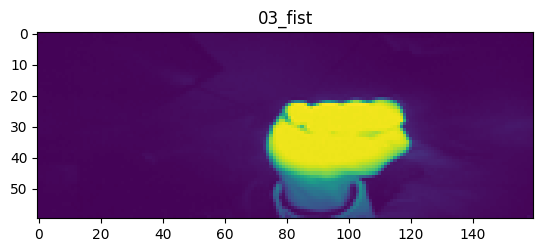

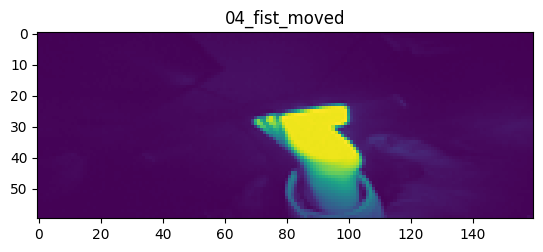

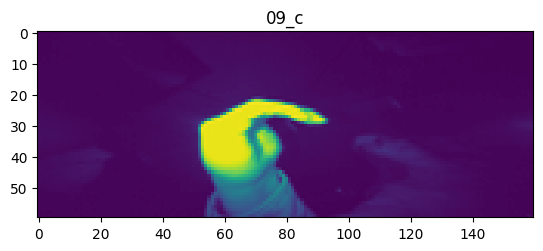

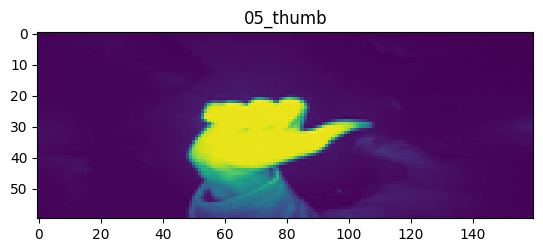

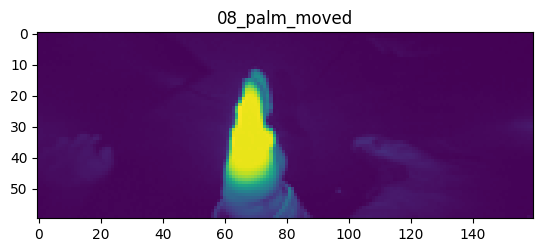

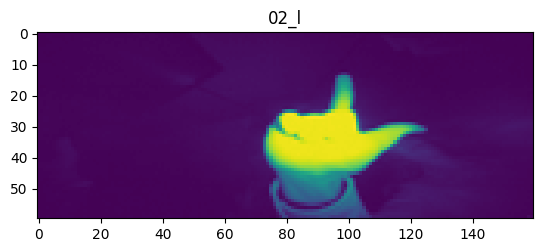

In [16]:
from random import randint
for i in range(0, 10):
    plt.imshow(X[i*200, :, :])
    plt.title(reverselookup[Y[i*200]])
    plt.show()

In [17]:
X = X.reshape(datacount, 60, 160, 1)
X /= 255.0

In [18]:
X_train, X_vd, Y_train, Y_vd = train_test_split(X, Y, test_size=0.2, random_state=42)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_vd, Y_vd, test_size=0.2, random_state=42)

In [19]:
model = Sequential([
    Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 78, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 39, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 37, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 18, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 16, 128)        73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 8, 128)         0

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, validation_data=(X_validate, Y_validate), batch_size=32)

500/500 [==============================] - 70s 137ms/step - loss: 0.2894 - accuracy: 0.9018 - val_loss: 0.0189 - val_accuracy: 0.9928


In [23]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

25/25 [==============================] - 1s 33ms/step - loss: 0.0113 - accuracy: 0.9950
Loss: 0.01126448716968298
Accuracy: 0.9950000047683716


1/1 [==============================] - 0s 228ms/step
Predicted class: 01_palm
Actual class: 01_palm


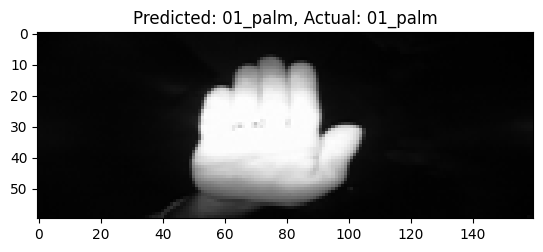

In [24]:
index = randint(0, len(X_test) - 1)
image = X_test[index]

prediction = model.predict(np.expand_dims(image, axis=0))

predicted_class_index = np.argmax(prediction)
predicted_class_label = reverselookup[predicted_class_index]

actual_class_index = Y_test[index]
actual_class_label = reverselookup[actual_class_index]

print("Predicted class:", predicted_class_label)
print("Actual class:", actual_class_label)

plt.imshow(image.reshape(60, 160), cmap='gray')
plt.title(f"Predicted: {predicted_class_label}, Actual: {actual_class_label}")
plt.show()